current samples: ['0.7852', '0.9543', '0.5019']


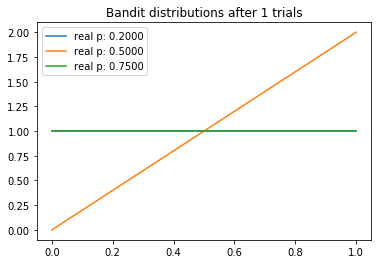

current samples: ['0.3180', '0.3113', '0.8935']


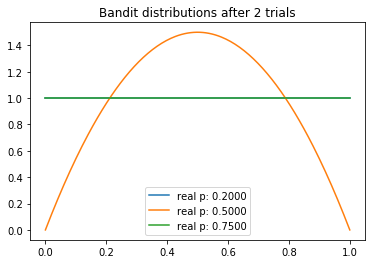

current samples: ['0.3035', '0.8230', '0.4530']


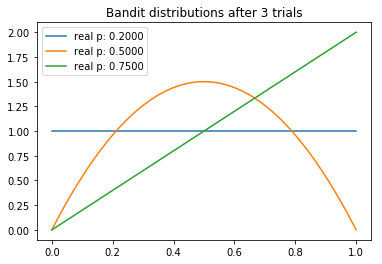

current samples: ['0.6614', '0.6478', '0.8975']


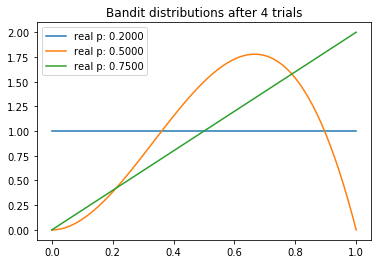

current samples: ['0.9597', '0.4759', '0.6778']


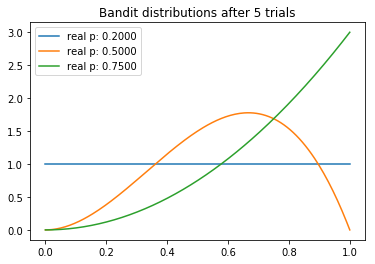

current samples: ['0.3019', '0.5694', '0.9571']


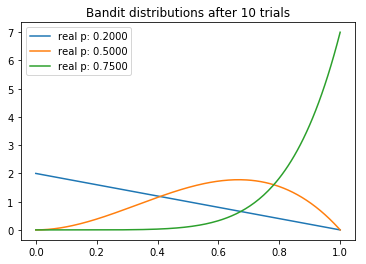

current samples: ['0.7397', '0.7197', '0.8264']


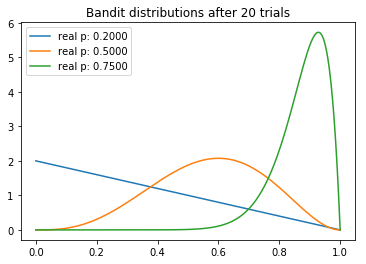

current samples: ['0.0295', '0.3162', '0.8168']


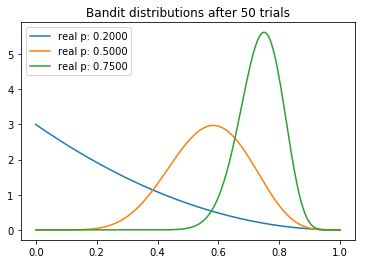

current samples: ['0.0298', '0.3736', '0.7179']


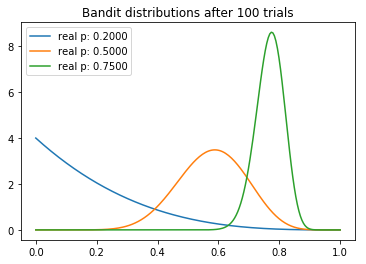

current samples: ['0.1007', '0.6012', '0.7432']


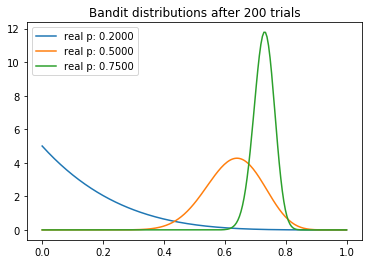

current samples: ['0.0415', '0.5953', '0.7247']


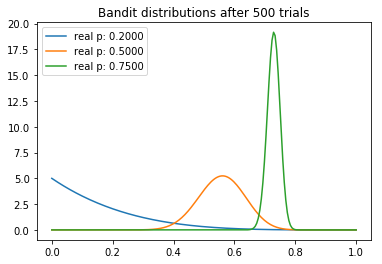

current samples: ['0.1508', '0.3925', '0.7372']


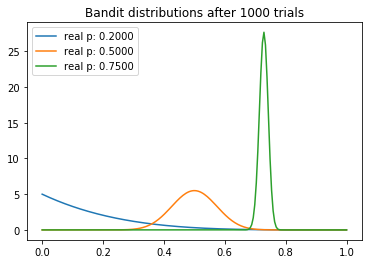

current samples: ['0.2467', '0.5300', '0.7321']


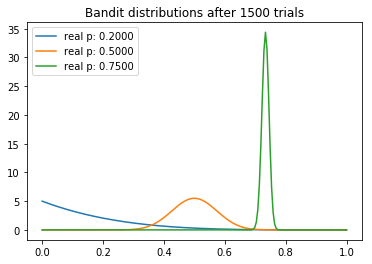

current samples: ['0.4302', '0.6386', '0.7396']


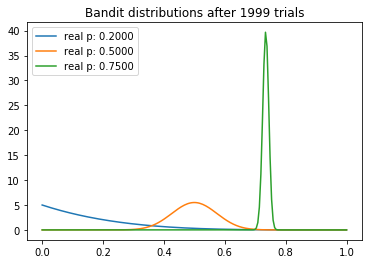

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


NUM_TRIALS = 2000
BANDIT_PROBABILITIES=[0.2,0.5,0.75]

class Bandit(object):
  def __init__(self, p): #p=winning
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a =self.a+ x
    self.b =self.b+ 1 - x  #x is 0 or 1


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [1,2,3,4,5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)


if __name__ == "__main__":
 experiment()

In [2]:
#Thmpson sampling convergence 
import matplotlib.pyplot as plt
import numpy as np
from bayesian_bandit import Bandit

def run_experiment(p1,p2,p3,trials):
    bandits=[Bandit(p1),Bandit(p2),Bandit(p3)]
    
    data=np.empty(N)
    
    for i in range(N):
        j=np.argmax([b.sample() for b in bandits])
        x=bandits.pull()
        bandits[j].update(x)
        
        data[i]=x
    cumlative_average_ctr=np.cumsum(data)/(np.arange(N)+1)
    
    plt.plot(cumlative_average_ctr)
    plt.plot(np.ones(N)*p1)
    plt.plot(np.ones(N)*p2)
    plt.plot(np.ones(N)*p3)
    Plt.xscale('log')
    plo.show()
  
run_experiment(0,2,0.25,0.6,100000)

ModuleNotFoundError: No module named 'bayesian_bandit'

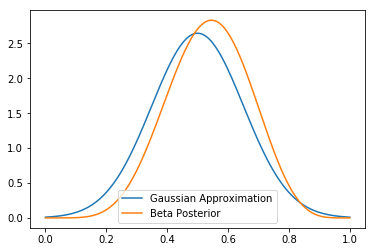

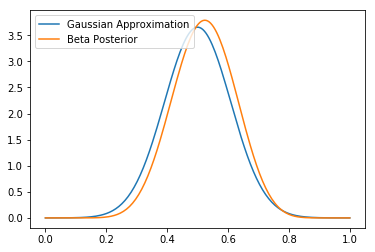

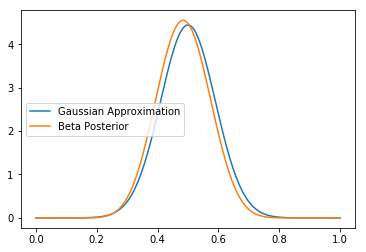

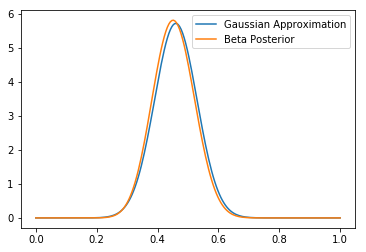

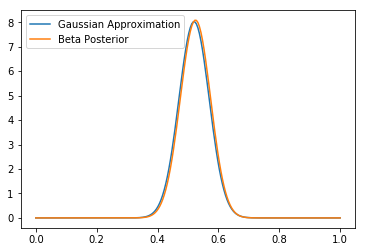

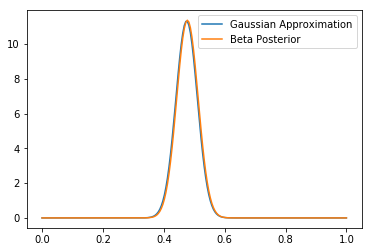

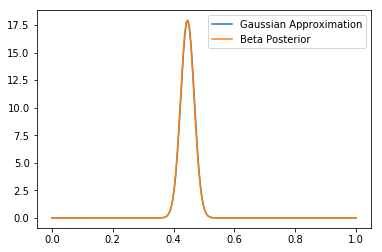

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta,norm

T=501
true_ctr=0.5
a,b=1,1
plot_indices=(10,20,30,50,100,200,500)

data=np.empty(T)
for i in range(T):
    x=1 if np.random.random()<true_ctr else 0
    data[i]=x
    
    a+=x
    b+=1-x
    
    if i in plot_indices:
        p=data[:i].mean()
        n=i+1
        std=np.sqrt(p*(1-p)/n)
        
        x=np.linspace(0,1,200)
        g=norm.pdf(x,loc=p,scale=std)
        plt.plot(x,g,label='Gaussian Approximation')
        
        posterior=beta.pdf(x,a=a,b=b)
        plt.plot(x,posterior,label='Beta Posterior')
        plt.legend()
        plt.title=("N=%s"%n)
        plt.show()